# Riesgo por incumplimiento de pagos en créditos de vivienda
---------------------------------------------------------------------------------------------------------------------------

**Autor:** Cristhian David Tafur Hernández

**Asesor:** Raul Ramos

Notebook: 01 Cargue y exploración de datos

Objetivo de la Iteración:

Explorar la tabla principal del proyecto "application_train".

## Cargue de librerías

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ruta_lectura ='/content/drive/MyDrive/Monografia/data_modelo/'

## Carga de data: application_train

* Es la Tabla principal del proyecto, la cual contiene información para una muestra de créditos donde se tiene el TARGET (incumplió / No incumplió) e información del titular del crédito al momento de su solicitud. 
 
 
* Son datos estáticos para todas las aplicaciones. Una fila representa un préstamo en nuestra muestra de datos, es decir, no hay información repetida para ninguno de los créditos de la data

In [ ]:
#Carga de datos
d = pd.read_csv (ruta_lectura + 'application_train.csv')

In [ ]:
# Dimensionalidad de "Application"
print('Dimensionalidad de los datos:')
print('-----------------------------------------------')
print('Número de muestras: ', d.shape[0], 'Créditos/prestamos')
print('Número de features en application: ', d.shape[1]-2) #menos 2 porque se excluye el Target y el "id" de la muestra

Dimensionalidad de los datos:
-----------------------------------------------
Número de muestras:  307511 Créditos/prestamos
Número de features en application:  120


In [ ]:
#Tipos de variables.
# Se apoya en un documento construido previamente para la descripción de los datos
det_var = pd.read_excel(ruta_lectura + 'type_variables.xlsx')
det_app = det_var[det_var['Table']=='application_{train|test}.csv']

pd.DataFrame(det_app.groupby('type').count()['nun_var']).sort_values(by = 'nun_var')

,nun_var
type,
ID,1
TARGET,1
C,48
N,72


La tabla anterior describe los tipos de variables que tiene “Application”. Se observa que están el “ID” de la muestra, el “Target”, y un total de 48 variables categóricas (“C”) y 72 numéricas (“N”). Está información se extrae de un análisis a detalle de la data y reposa en un archivo Excel complementario llamado “type_variables.xlsx”

## 1. Análisis exploratorio de los datos

### TARGET

Variable objetivo:
* 1 - cliente con dificultades de pago: tuvo un retraso en el pago de más de X días en al menos una de las primeras Y cuotas del préstamo en nuestra muestra
* 0 - todos los demás casos

Nota: Datos son estáticos para todas las aplicaciones. Cáda fila representa un préstamo en nuestra muestra de datos. (ID del crédito único, NO se repiten en la muestra)

In [ ]:
# validación de ID único
print('validación de que "SK_ID_CURR" es único en Application:')
len(d['SK_ID_CURR']) == len(d['SK_ID_CURR'].unique())

validación de que "SK_ID_CURR" es único en Application:


True

In [ ]:
# Distribución de la variable TARGET en sus respectivas categorías
print(pd.value_counts(d['TARGET'], normalize=True))
print('--------------------------------')
print(' Se trata de un problema de clasificación con datos desbalanceados')

0    0.919271
1    0.080729
Name: TARGET, dtype: float64
--------------------------------
 Se trata de un problema de clasificación con datos desbalanceados


### Features numéricas

In [ ]:
#Identificación de variables numéricas
det_app_N = det_app[(det_app['type']=='N')]
var_n = det_app_N['column'].tolist()
var_n.append('TARGET')

In [ ]:
dn = d[var_n]

In [ ]:
#Tipificación de las variables y cantidad de valores no nulos
dn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   CNT_CHILDREN                  307511 non-null  int64  
 1   AMT_INCOME_TOTAL              307511 non-null  float64
 2   AMT_CREDIT                    307511 non-null  float64
 3   AMT_ANNUITY                   307499 non-null  float64
 4   AMT_GOODS_PRICE               307233 non-null  float64
 5   REGION_POPULATION_RELATIVE    307511 non-null  float64
 6   DAYS_BIRTH                    307511 non-null  int64  
 7   DAYS_EMPLOYED                 307511 non-null  int64  
 8   DAYS_REGISTRATION             307511 non-null  float64
 9   DAYS_ID_PUBLISH               307511 non-null  int64  
 10  OWN_CAR_AGE                   104582 non-null  float64
 11  CNT_FAM_MEMBERS               307509 non-null  float64
 12  REGION_RATING_CLIENT          307511 non-nul

In [ ]:
# Estadísticas descriptivas de las variables 
dn_describe=dn.describe().T
pd.set_option('display.max_rows', dn_describe.shape[0]+1)
dn_describe

,count,mean,std,min,25%,50%,75%,max
CNT_CHILDREN,307511.0,0.417052,0.722121,0.000000e+00,0.000000,0.000000,1.000000,1.900000e+01
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,2.565000e+04,112500.000000,147150.000000,202500.000000,1.170000e+08
AMT_CREDIT,307511.0,599025.999706,402490.776996,4.500000e+04,270000.000000,513531.000000,808650.000000,4.050000e+06
AMT_ANNUITY,307499.0,27108.573909,14493.737315,1.615500e+03,16524.000000,24903.000000,34596.000000,2.580255e+05
AMT_GOODS_PRICE,307233.0,538396.207429,369446.460540,4.050000e+04,238500.000000,450000.000000,679500.000000,4.050000e+06
REGION_POPULATION_RELATIVE,307511.0,0.020868,0.013831,2.900000e-04,0.010006,0.018850,0.028663,7.250800e-02
DAYS_BIRTH,307511.0,-16036.995067,4363.988632,-2.522900e+04,-19682.000000,-15750.000000,-12413.000000,-7.489000e+03
DAYS_EMPLOYED,307511.0,63815.045904,141275.766519,-1.791200e+04,-2760.000000,-1213.000000,-289.000000,3.652430e+05
DAYS_REGISTRATION,307511.0,-4986.120328,3522.886321,-2.467200e+04,-7479.500000,-4504.000000,-2010.000000,0.000000e+00
DAYS_ID_PUBLISH,307511.0,-2994.202373,1509.450419,-7.197000e+03,-4299.000000,-3254.000000,-1720.000000,0.000000e+00


In [ ]:
# Porcentaje de datos faltantes por variable
pd.DataFrame(dn.isna().sum()/dn.shape[0]).sort_values(by = 0, ascending=False ).rename(columns = {0: '% missing_values'})

,% missing_values
COMMONAREA_MODE,0.698723
COMMONAREA_AVG,0.698723
COMMONAREA_MEDI,0.698723
NONLIVINGAPARTMENTS_MEDI,0.694330
NONLIVINGAPARTMENTS_MODE,0.694330
NONLIVINGAPARTMENTS_AVG,0.694330
LIVINGAPARTMENTS_MODE,0.683550
LIVINGAPARTMENTS_MEDI,0.683550
LIVINGAPARTMENTS_AVG,0.683550
FLOORSMIN_MODE,0.678486


* **Correlación lineal entre las features**

In [ ]:
# Estimación de correlación lineal de las variables númericas
# Coeficiente de correlación de Pearson
# Imputación de valores faltantes preliminar con la mediana para poder estimar la correlación de pearson y su p-valor

from scipy.stats import pearsonr

print('Se estima el coeficiente de correración de Pearson por pares de variables.')
print('-------------------------------------------------------------------------')
print('Se aplica un test estadístico para confirmar o descartar correlación entre las variables')
print('H0: Variables NO correlacionadas, H1: Variables correlacionadas ')
print('-------------------------------------------------------------------------')
print('Observamos el Top 10 de pares de features que tienen mayor correlación entre ellas')

Caracteristicas = var_n[:-1]

comb_caracteristicas = []
for c1 in Caracteristicas:
    for c2 in Caracteristicas:
        lis_1 = sorted([c1, c2])
        r_valor, p_valor = pearsonr(dn[c1].fillna(dn[c1].median()), dn[c2].fillna(dn[c2].median()))
        lis_1.append(r_valor)
        lis_1.append(p_valor)
        
        comb_caracteristicas.append(lis_1)
        
df_corr = pd.DataFrame(comb_caracteristicas)
df_corr.rename(columns ={0:'Variable_1',1:'Variable_2', 2:'Corr_pearson', 3: 'p_valor_pearson'}, inplace = True)
df_corr.drop_duplicates(subset=['Variable_1', 'Variable_2'], inplace = True)

df_corr = df_corr[df_corr['Variable_1']!=df_corr['Variable_2']]
df_corr['corr_pearson_abs'] =abs(df_corr['Corr_pearson'])

Se estima el coeficiente de correración de Pearson por pares de variables.
-------------------------------------------------------------------------
Se aplica un test estadístico para confirmar o descartar correlación entre las variables
H0: Variables NO correlacionadas, H1: Variables correlacionadas 
-------------------------------------------------------------------------
Observamos el Top 10 de pares de features que tienen mayor correlación entre ellas


In [ ]:
# Observamos los pares de features que tienen mayor corelación entre ellas
print('Se estima el coeficiente de correración de Pearson por pares de variables.')
print('-------------------------------------------------------------------------')
print('Se aplica un test estadístico para confirmar o descartar correlación entre las variables:')
print('H0: Variables NO correlacionadas')
print('H1: Variables correlacionadas ')
print('-------------------------------------------------------------------------')
print('Observamos el Top 10 de pares de features que tienen mayor correlación entre ellas')

df_corr.sort_values(by='corr_pearson_abs', ascending=False).head(10)

Se estima el coeficiente de correración de Pearson por pares de variables.
-------------------------------------------------------------------------
Se aplica un test estadístico para confirmar o descartar correlación entre las variables:
H0: Variables NO correlacionadas
H1: Variables correlacionadas 
-------------------------------------------------------------------------
Observamos el Top 10 de pares de features que tienen mayor correlación entre ellas


,Variable_1,Variable_2,Corr_pearson,p_valor_pearson,corr_pearson_abs
1561,YEARS_BUILD_AVG,YEARS_BUILD_MEDI,0.998495,0.0,0.998495
4455,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,0.998491,0.0,0.998491
1926,FLOORSMIN_AVG,FLOORSMIN_MEDI,0.997278,0.0,0.997278
1853,FLOORSMAX_AVG,FLOORSMAX_MEDI,0.997260,0.0,0.997260
1780,ENTRANCES_AVG,ENTRANCES_MEDI,0.996900,0.0,0.996900
1707,ELEVATORS_AVG,ELEVATORS_MEDI,0.996692,0.0,0.996692
1634,COMMONAREA_AVG,COMMONAREA_MEDI,0.996229,0.0,0.996229
2145,LIVINGAREA_AVG,LIVINGAREA_MEDI,0.995783,0.0,0.995783
1342,APARTMENTS_AVG,APARTMENTS_MEDI,0.995234,0.0,0.995234
1415,BASEMENTAREA_AVG,BASEMENTAREA_MEDI,0.994389,0.0,0.994389


* **Análisis de la varianza: ANOVA**

A continuación, se aplica un análisis de la varianza con el fin de evaluar si existe diferencia entre las medias de las variables numéricas al agruparlas por cada una de las dos clases del TARGET (0 y 1). – (media de las muestras de la clase 0 v.s media de las muestras de la clase 1)

In [ ]:
from scipy.stats import f_oneway

d_0 = dn[dn['TARGET']==0]
d_1 = dn[dn['TARGET']==1]

l1 = []

for v in var_n:
    f_valores, p_valor = f_oneway(d_0[v].dropna(), d_1[v].dropna())
    
    med_dif = 0
    
    if p_valor<0.05:
        med_dif = 1
        
    
    l2 = [v,f_valores, p_valor, med_dif]
    l1.append(l2)

d_anova = pd.DataFrame(l1, columns=['Variable', 'f_valor', ' p_valor', 'med_dif'])
d_anova.sort_values(by='f_valor', ascending=False, inplace = True)

In [ ]:
print('Se aplica un test estadístico para confirmar o descartar diferencia estadística entre las medias:')
print('H0: Las medias de las variables agrupadas por las clases del TARGET **son** estadísticamente diferentes')
print('H1: Las medias de las variables agrupadas por las clases del TARGET **NO son** estadísticamente diferentes ')
print('-------------------------------------------------------------------------')
print('Se muestra el listado de Features numéricas y los resultados del test')
d_anova

Se aplica un test estadístico para confirmar o descartar diferencia estadística entre las medias:
H0: Las medias de las variables agrupadas por las clases del TARGET **son** estadísticamente diferentes
H1: Las medias de las variables agrupadas por las clases del TARGET **NO son** estadísticamente diferentes 
-------------------------------------------------------------------------
Se muestra el listado de Features numéricas y los resultados del test


,Variable,f_valor,p_valor,med_dif
17,EXT_SOURCE_3,8.153346e+03,0.000000e+00,1
16,EXT_SOURCE_2,8.110574e+03,0.000000e+00,1
15,EXT_SOURCE_1,3.315683e+03,0.000000e+00,1
6,DAYS_BIRTH,1.893976e+03,0.000000e+00,1
13,REGION_RATING_CLIENT_W_CITY,1.144461e+03,2.078455e-250,1
12,REGION_RATING_CLIENT,1.070491e+03,2.172433e-234,1
65,DAYS_LAST_PHONE_CHANGE,9.404844e+02,3.188161e-206,1
9,DAYS_ID_PUBLISH,8.163965e+02,2.527524e-179,1
7,DAYS_EMPLOYED,6.220717e+02,3.631173e-137,1
8,DAYS_REGISTRATION,5.427530e+02,6.036553e-120,1


In [ ]:
d_anova[d_anova['med_dif']==1].shape

(65, 4)

In [ ]:
# Se eligen 8 variables arbitrariamente para observar gráficamente
#la diferencia en la distribución de sus datos por cada una de las clases del TARGET.

foco_columns = ['EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1','DAYS_BIRTH', 'DAYS_EMPLOYED', 'AMT_INCOME_TOTAL',
                'AMT_GOODS_PRICE','AMT_CREDIT', 'TARGET']

In [ ]:
# Por limitaciones computacionales se selecciona una sub muestra para la elaboración de la gráfica 
# Se asegura que se mantenga la estratificación aproximada de la data original por las clases del TARGET
d_foco = d[foco_columns]

N = 1000
N0 = int(N * 0.08)
N1 = N - N0

d_foco_s= pd.concat([d_foco[d_foco['TARGET']==0].sample(n=N0,random_state=4),
                     d_foco[d_foco['TARGET']==1].sample(n=N1,random_state=4)], axis=0)

In [ ]:
# Validación de estratificación de la sub muestra
pd.value_counts(d_foco_s['TARGET'], normalize=True)

1    0.92
0    0.08
Name: TARGET, dtype: float64

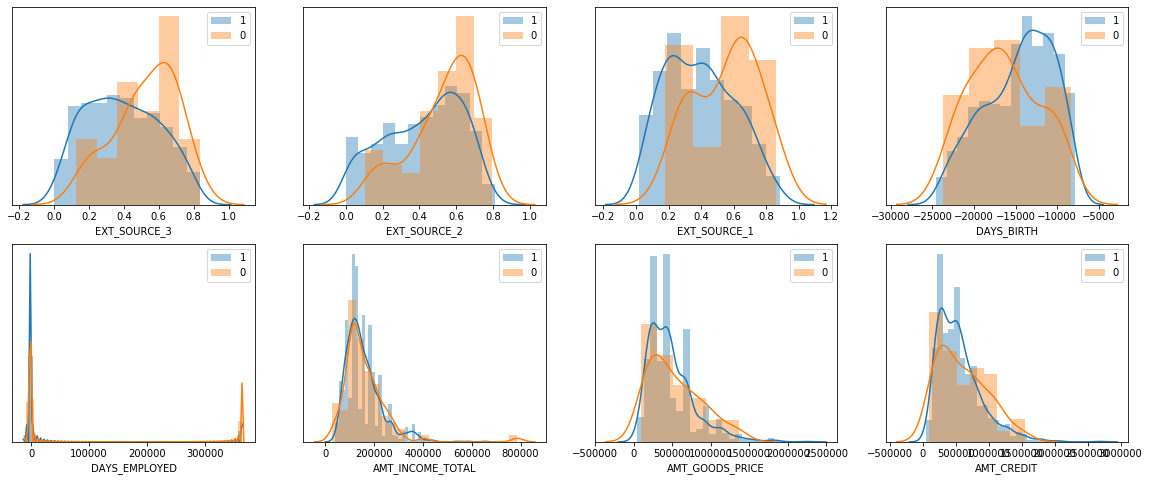

In [ ]:
## KEEPOUTPUT
plt.figure(figsize=(20,8))
for i,c in enumerate(foco_columns[:-1]):    
    plt.subplot(2,4,i+1)
    k=d_foco_s[['TARGET',c]].dropna()
    for v in d['TARGET'].dropna().unique():
        sns.distplot(k[c][k['TARGET']==v], label=v);
    plt.yticks([])
    plt.legend()

### Features categóricas

In [ ]:
#Identificación de variables categóricas
det_app_C = det_app[(det_app['type']=='C')]
var_c = det_app_C['column'].tolist()
var_c.append('TARGET')

In [ ]:
d_c = d[var_c]

In [ ]:
d_c

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,...,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,TARGET
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,1,...,0,0,0,0,0,0,0,0,0,1
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,1,...,0,0,0,0,0,0,0,0,0,0
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,1,...,0,0,0,0,0,0,0,0,0,0
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,1,...,0,0,0,0,0,0,0,0,0,0
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,Cash loans,M,N,N,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,1,...,0,0,0,0,0,0,0,0,0,0
307507,Cash loans,F,N,Y,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,1,...,0,0,0,0,0,0,0,0,0,0
307508,Cash loans,F,N,Y,Unaccompanied,Working,Higher education,Separated,House / apartment,1,...,0,0,0,0,0,0,0,0,0,0
307509,Cash loans,F,N,Y,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,1,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
print('Visualización de las clases de las variables categóricas')
print('---------------------------------------------')
for c in var_c:
    print ("%10s"%c, np.unique(d_c[c].dropna()))

Visualización de las clases de las variables categóricas
---------------------------------------------
NAME_CONTRACT_TYPE ['Cash loans' 'Revolving loans']
CODE_GENDER ['F' 'M' 'XNA']
FLAG_OWN_CAR ['N' 'Y']
FLAG_OWN_REALTY ['N' 'Y']
NAME_TYPE_SUITE ['Children' 'Family' 'Group of people' 'Other_A' 'Other_B'
 'Spouse, partner' 'Unaccompanied']
NAME_INCOME_TYPE ['Businessman' 'Commercial associate' 'Maternity leave' 'Pensioner'
 'State servant' 'Student' 'Unemployed' 'Working']
NAME_EDUCATION_TYPE ['Academic degree' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Secondary / secondary special']
NAME_FAMILY_STATUS ['Civil marriage' 'Married' 'Separated' 'Single / not married' 'Unknown'
 'Widow']
NAME_HOUSING_TYPE ['Co-op apartment' 'House / apartment' 'Municipal apartment'
 'Office apartment' 'Rented apartment' 'With parents']
FLAG_MOBIL [0 1]
FLAG_EMP_PHONE [0 1]
FLAG_WORK_PHONE [0 1]
FLAG_CONT_MOBILE [0 1]
FLAG_PHONE [0 1]
FLAG_EMAIL [0 1]
OCCUPATION_TYPE ['Accountants' 'Cleani

No handles with labels found to put in legend.
No handles with labels found to put in legend.


Visualización gráfica de la distribución de 4 variables categóricas (elegidas arbitrariamente)
---------------------------------------------


No handles with labels found to put in legend.
No handles with labels found to put in legend.


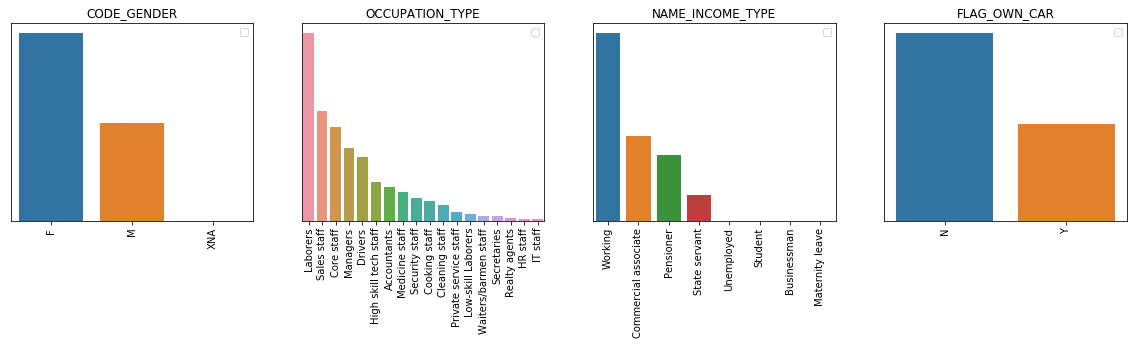

In [ ]:
print('Visualización gráfica de la distribución de 4 variables categóricas (elegidas arbitrariamente)')
print('---------------------------------------------')
plt.figure(figsize=(20,8))
for i,c in enumerate(["CODE_GENDER", "OCCUPATION_TYPE","NAME_INCOME_TYPE", "FLAG_OWN_CAR"]): 
    plt.subplot(2,4,i+1)
    plt.title(c)
    plt.yticks([])
    plt.legend()
    vc = d_c[c].value_counts()
    sns.barplot(vc.index, vc.values)    
    plt.xticks(range(len(vc)), vc.index, rotation="vertical")